# SmartPrice Auto AI - Predicts the value of Pre-Owned Cars

The second-hand car market has continued to expand even as the reduction in the market of new cars. The price of Pre-owned cars depends on many factors like fuel type, colour, model, mileage, transmission, engine, number of seats etc.
The Pre-owned cars price in the market will keep on changing. Thus the evaluation model to predict the price of the Pre-owned cars is required.

## Problem Statement

In this project, we are going to proposed a predictive model using various regression model on our Pre-owned cars dataset to predict the prices of cars.

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress warning
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
print("Training Data : ", train_data.shape)
print("Test Data : ", test_data.shape)

Training Data :  (6019, 14)
Test Data :  (1234, 13)


First of all I'll tag data as "train" and "test" and concatenate data for cleaning and visualization

In [6]:
train_data['tag'] = "train"
test_data['tag'] = "test"

In [7]:
cars_data = pd.concat([train_data,test_data], ignore_index=True)

In [8]:
cars_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,tag
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,train
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,train
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,train
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,train
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,train


Check the data for null values

In [9]:
cars_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
tag                     0
dtype: int64

Since "New_Price" and "Unnamed: 0" is mostly null and has no added value, we can simply drop it

In [10]:
cars_data.drop(["Unnamed: 0","New_Price"], axis =1 , inplace = True)

In [11]:
cars_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,train
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,train
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,train
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,train
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,test
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,test
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,test
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,test


In [12]:
cars_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
tag                   object
dtype: object

In [13]:
cars_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

lets check the seats for 10 and 9

In [14]:
cars_data[cars_data['Seats'].isin([10.0,9.0])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,3.50,train
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,5.25,train
1347,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,9.0,4.10,train
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,3.65,train
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0 kmpl,2446 CC,null bhp,10.0,3.50,train
2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58 kmpl,2499 CC,78 bhp,9.0,4.75,train
2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,9.0,4.50,train
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,5.50,train
6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.2 kmpl,1948 CC,68 bhp,10.0,NaN,test
6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,test


lets check the seats for 0 and nan

In [15]:
cars_data[cars_data['Seats'].isin([0.0,"nan"])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0,train


In [16]:
cars_data[cars_data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,train
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,train
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60,train
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,train
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,train
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20,train
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80,train
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50,train
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88,train
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70,train


Dropping rows where rows with NAN in it

In [17]:
cars_data_1 = cars_data.dropna(subset=['Mileage','Engine','Power','Seats'])
cars_data_1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,train
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,train
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,train
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,train
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,test
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,test
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,test
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,test


In [18]:
cars_data_1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1223
tag                     0
dtype: int64

In [19]:
cars_data_1['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [20]:
cars_data_1[cars_data_1['Seats'] == 0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0,train


Lets recorrect it

In [21]:
cars_data_1.loc[3999,"Seats"] = 5.0

In [22]:
cars_data_1[cars_data_1['Mileage'].str.contains("km/kg")]['Fuel_Type'].unique()

array(['CNG', 'LPG'], dtype=object)

Since, LPG and CNG has different densities we will use different values for each. 

In [23]:
lpg_density = 0.493 # kg/L for LPG
cng_density = 0.72 # kg/L for CNG

def convert_kmkg_to_kmpl(row):
    if "km/kg" in row['Mileage'] and "LPG" in row['Fuel_Type']:
        mileage_value = row['Mileage'].split(" ")[0]
        converted_value = float(mileage_value)/lpg_density
        return f"{round(converted_value,2)} kmpl"
    
    elif "km/kg" in row['Mileage'] and "CNG" in row['Fuel_Type']:
        mileage_value = row['Mileage'].split(" ")[0]
        converted_value = float(mileage_value)/cng_density
        return f"{round(converted_value,2)} kmpl"
    
    else:
        return row['Mileage']
    
cars_data_1['new_mileage'] = cars_data_1.apply(convert_kmkg_to_kmpl, axis = 1)

In [24]:
cars_data_1['Mileage (kmpl)'] = cars_data_1['new_mileage'].str.split(" ", expand=True)[0]

In [25]:
cars_data_1['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC',
       '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC', '1395 CC',
       '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368 CC',

In [26]:
cars_data_1['Engine (CC)'] = cars_data_1['Engine'].str.split(" ", expand=True)[0]

In [27]:
cars_data_1['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [28]:
cars_data_1['Power (bhp)'] = cars_data_1['Power'].str.split(" ", expand=True)[0]

In [29]:
cars_data_1['Power (bhp)'] = cars_data_1['Power (bhp)'].replace("null",0)

In [30]:
power_median = np.median(cars_data_1['Power (bhp)'].astype(float))

In [31]:
cars_data_1['Power (bhp)'] = cars_data_1['Power (bhp)'].replace(0,power_median)

In [32]:
cars_data_1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'tag', 'new_mileage', 'Mileage (kmpl)', 'Engine (CC)',
       'Power (bhp)'],
      dtype='object')

Lets split "Name" into Brand Names and Model

In [33]:
cars_data_1['Brand'] = cars_data_1['Name'].str.split(" ", expand=True)[0]
cars_data_1['Model'] = cars_data_1['Name'].str.split(" ", expand=True)[1]

In [34]:
cars_data_1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,tag,new_mileage,Mileage (kmpl),Engine (CC),Power (bhp),Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,train,36.94 kmpl,36.94,998,58.16,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,train,19.67 kmpl,19.67,1582,126.2,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,train,18.2 kmpl,18.2,1199,88.7,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,train,20.77 kmpl,20.77,1248,88.76,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,train,15.2 kmpl,15.2,1968,140.8,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,test,20.54 kmpl,20.54,1598,103.6,Volkswagen,Vento
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,test,17.21 kmpl,17.21,1197,103.6,Volkswagen,Polo
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,test,23.08 kmpl,23.08,1461,63.1,Nissan,Micra
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,test,17.2 kmpl,17.2,1197,103.6,Volkswagen,Polo


Dropping unneccesary columns

In [35]:
cars_data_2 = cars_data_1.drop(['Name','Mileage', 'Engine', 'Power','new_mileage'], axis = 1)

In [36]:
cars_data_2[["Mileage (kmpl)","Power (bhp)"]] = cars_data_2[["Mileage (kmpl)","Power (bhp)"]].astype(float)

In [37]:
cars_data_2[["Seats",'Engine (CC)']] = cars_data_2[["Seats",'Engine (CC)']].astype(int)

In [38]:
cars_data_2.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                  int32
Price                float64
tag                   object
Mileage (kmpl)       float64
Engine (CC)            int32
Power (bhp)          float64
Brand                 object
Model                 object
dtype: object

In [39]:
cars_data_2.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'tag', 'Mileage (kmpl)', 'Engine (CC)',
       'Power (bhp)', 'Brand', 'Model'],
      dtype='object')

In [40]:
cars_data_2

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,tag,Mileage (kmpl),Engine (CC),Power (bhp),Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,5,1.75,train,36.94,998,58.16,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,5,12.50,train,19.67,1582,126.20,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,5,4.50,train,18.20,1199,88.70,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,7,6.00,train,20.77,1248,88.76,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5,17.74,train,15.20,1968,140.80,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,5,NaN,test,20.54,1598,103.60,Volkswagen,Vento
7249,Mumbai,2015,59000,Petrol,Automatic,First,5,NaN,test,17.21,1197,103.60,Volkswagen,Polo
7250,Kolkata,2012,28000,Diesel,Manual,First,5,NaN,test,23.08,1461,63.10,Nissan,Micra
7251,Pune,2013,52262,Petrol,Automatic,Third,5,NaN,test,17.20,1197,103.60,Volkswagen,Polo


Lets add age of car using Year column

In [41]:
cars_data_2['Cars_age'] = 2024 - cars_data_2['Year']

In [42]:
cars_data_2['Cars_age'].unique()

array([14,  9, 13, 12, 11,  8,  6, 10,  7, 17, 15, 16,  5, 18, 19, 20, 22,
       24, 21, 25, 23, 26, 28], dtype=int64)

In [43]:
cars_data_3 = cars_data_2.drop('Year', axis=1)

In [44]:
cars_data_3 = cars_data_3[['Brand', 'Model', 'Location', 'Cars_age', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type','Mileage (kmpl)', 'Engine (CC)', 'Power (bhp)', 'Seats', 'Price', 'tag']]

In [45]:
cars_data_3.dtypes

Brand                 object
Model                 object
Location              object
Cars_age               int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage (kmpl)       float64
Engine (CC)            int32
Power (bhp)          float64
Seats                  int32
Price                float64
tag                   object
dtype: object

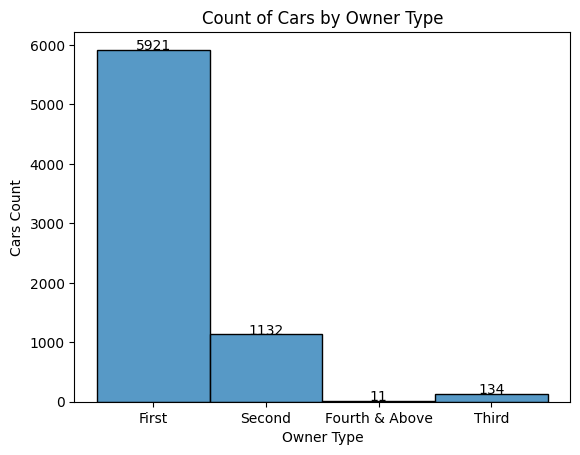

In [46]:
ax = sns.histplot(cars_data_3['Owner_Type'])

# Add counts on top of each bar
for patch in ax.patches:
    ax.text(
        patch.get_x() + patch.get_width() / 2,  # Center of the bar
        patch.get_height() + 0.5,               # Slightly above the bar
        int(patch.get_height()),                # The count
        ha='center', fontsize=10, color='black'
    )

# Labeling and title
plt.xlabel('Owner Type')
plt.ylabel('Cars Count')
plt.title('Count of Cars by Owner Type')
plt.show()

#### Fuel Type of cars

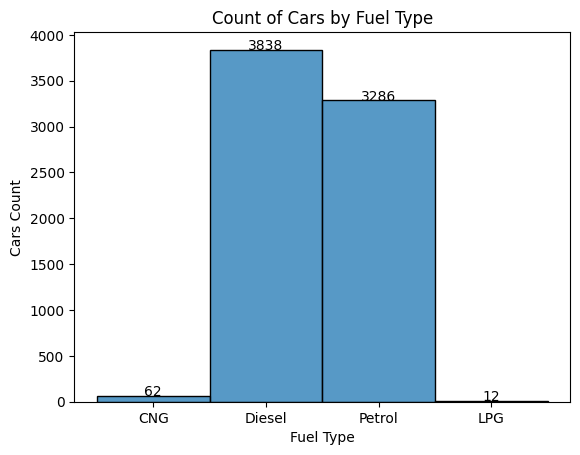

In [47]:
ax = sns.histplot(cars_data_3['Fuel_Type'])

# Add counts on top of each bar
for patch in ax.patches:
    ax.text(
        patch.get_x() + patch.get_width() / 2,  # Center of the bar
        patch.get_height() + 0.5,               # Slightly above the bar
        int(patch.get_height()),                # The count
        ha='center', fontsize=10, color='black'
    )

# Labeling and title
plt.xlabel('Fuel Type')
plt.ylabel('Cars Count')
plt.title('Count of Cars by Fuel Type')
plt.show()

#### Mileage of car vs Car's age

<Axes: xlabel='Cars_age', ylabel='Mileage (kmpl)'>

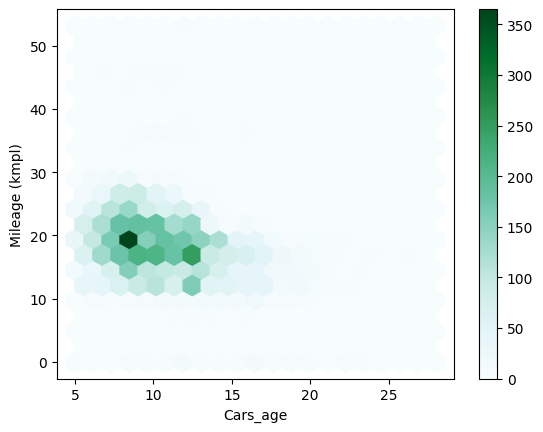

In [48]:
cars_data_3.plot.hexbin(x = 'Cars_age', y = 'Mileage (kmpl)', gridsize = 20)

From above chart, we can say that, cars within the 10-year age range show relatively higher fuel efficiency, while cars older than 10 years tend to experience a decline in mileage.

#### Region wise cars data

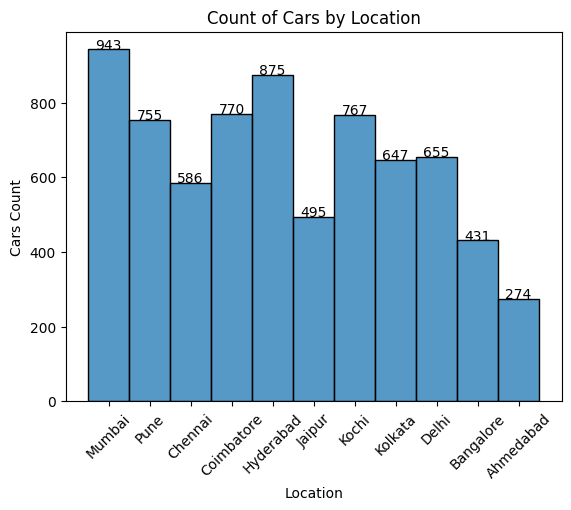

In [49]:
ax = sns.histplot(cars_data_3['Location'])

# Add counts on top of each bar
for patch in ax.patches:
    ax.text(
        patch.get_x() + patch.get_width() / 2,  # Center of the bar
        patch.get_height() + 0.5,               # Slightly above the bar
        int(patch.get_height()),                # The count
        ha='center', fontsize=10, color='black'
    )

# Labeling and title
plt.xlabel('Location')

plt.ylabel('Cars Count')

plt.title('Count of Cars by Location')

plt.xticks(rotation = 45)

plt.show()

Based on above chart, the Northern region of India has a higher concentration of cars compared to the Southern region, likely driven by differences in population density, economic conditions, or transportation preferences.

#### Engine power vs Mileage

<Axes: xlabel='Engine (CC)', ylabel='Mileage (kmpl)'>

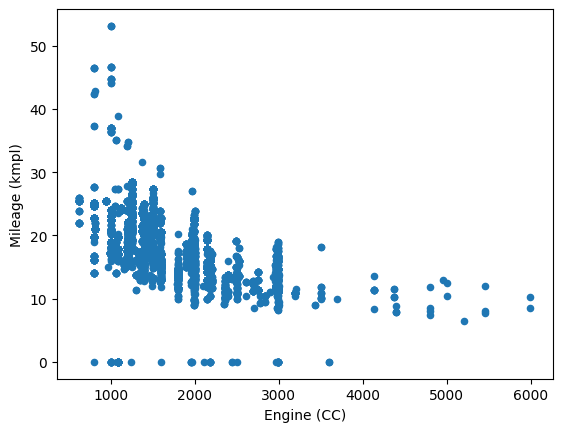

In [50]:
cars_data_3.plot.scatter(x = 'Engine (CC)', y = 'Mileage (kmpl)')

Based on the above chart, we can see that car with less engine power has better fuel efficieny than that of the higher engine power.

In [51]:
numerical_data = cars_data_3.select_dtypes(exclude="object")

In [52]:
print("Numerical columns : ", numerical_data.columns)

Numerical columns :  Index(['Cars_age', 'Kilometers_Driven', 'Mileage (kmpl)', 'Engine (CC)',
       'Power (bhp)', 'Seats', 'Price'],
      dtype='object')


# Checking and Handling Outliers

Using boxplot, we can check whether the given data has outliers or not.

In [53]:
numerical_data

,Cars_age,Kilometers_Driven,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
0,14,72000,36.94,998,58.16,5,1.75
1,9,41000,19.67,1582,126.20,5,12.50
2,13,46000,18.20,1199,88.70,5,4.50
3,12,87000,20.77,1248,88.76,7,6.00
4,11,40670,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...
7248,13,89411,20.54,1598,103.60,5,NaN
7249,9,59000,17.21,1197,103.60,5,NaN
7250,12,28000,23.08,1461,63.10,5,NaN
7251,11,52262,17.20,1197,103.60,5,NaN


Before handling, outliers lets check the correlation between variables where 'price' is our target variable

Since, I combined train and test data for preprocessing. Let's check only train data.

In [54]:
trained_numerical_data = numerical_data[~numerical_data['Price'].isnull()]

<Axes: >

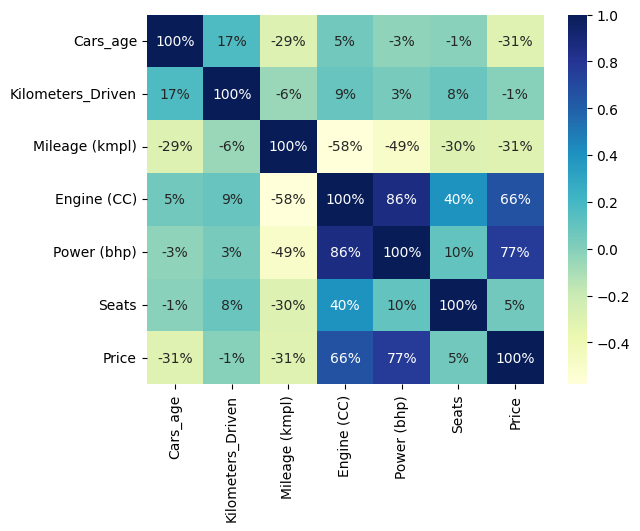

In [55]:
correlation_data = trained_numerical_data.corr()

sns.heatmap(correlation_data,annot=True, fmt=".0%", cmap="YlGnBu")

In [56]:
target_corr = correlation_data['Price'].sort_values(ascending=False)
print(target_corr)

Price                1.000000
Power (bhp)          0.771697
Engine (CC)          0.659117
Seats                0.053236
Kilometers_Driven   -0.011263
Mileage (kmpl)      -0.305063
Cars_age            -0.305800
Name: Price, dtype: float64


From correlation it is advent that column Seats and Kilometers_Driven has least impact on our target varaible price.

Kilometers_Driven:

-    Logically, this variable might impact a car's resale price as it reflects wear and tear. Older cars with more kilometers driven could have lower      prices.
-    Retain this feature for now due to its plausible real-world impact.

Seats:

-   The number of seats might not directly impact price in all cases, but it could be significant for customers depending on their use case.

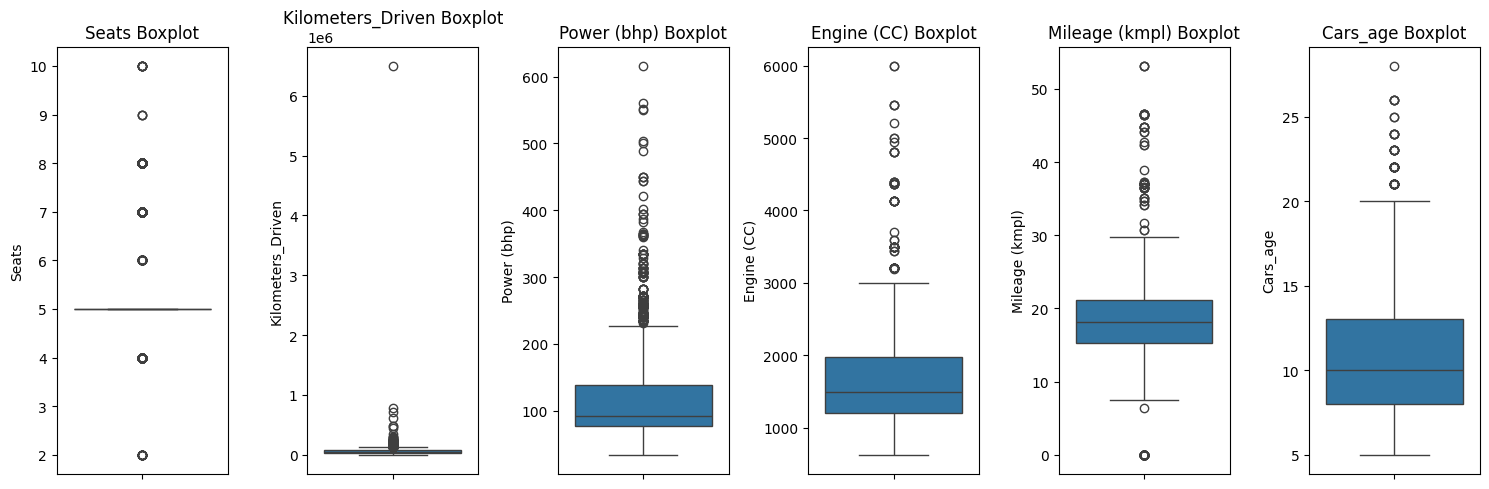

In [57]:
# List of numerical columns
numerical_columns = ['Seats','Kilometers_Driven','Power (bhp)', 'Engine (CC)', 'Mileage (kmpl)', 'Cars_age']

# Create subplots with automatic grid sizing
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))

# Loop through each column and create a boxplot
for col, ax in zip(numerical_columns, axes):
    sns.boxplot(data=numerical_data, y=col, ax=ax)
    ax.set_title(f"{col} Boxplot")
    ax.set_ylabel(col)

# Show the plot
plt.tight_layout()
plt.show()


- From above chart, we can see that Power, Kilometers, Engine and mileage cotains signifcant outliers.
- We will be using IQR method to handle outliers.

## Using Inter Quartile Range (IQR)

In [58]:
import pandas as pd

numerical_columns = ['Kilometers_Driven','Power (bhp)', 'Engine (CC)', 'Mileage (kmpl)']

numerical_data_copy = numerical_data[numerical_columns]

# Define thresholds using IQR method
for column in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numerical_data_copy[column].quantile(0.25)
    Q3 = numerical_data_copy[column].quantile(0.75)

    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside the bounds (outliers) to the nearest boundary values
    numerical_data_copy[column] = numerical_data_copy[column].clip(lower=lower_bound, upper=upper_bound)
    # lower: The minimum threshold value. Any value smaller than this will be replaced by lower.
    # upper: The maximum threshold value. Any value greater than this will be replaced by upper.

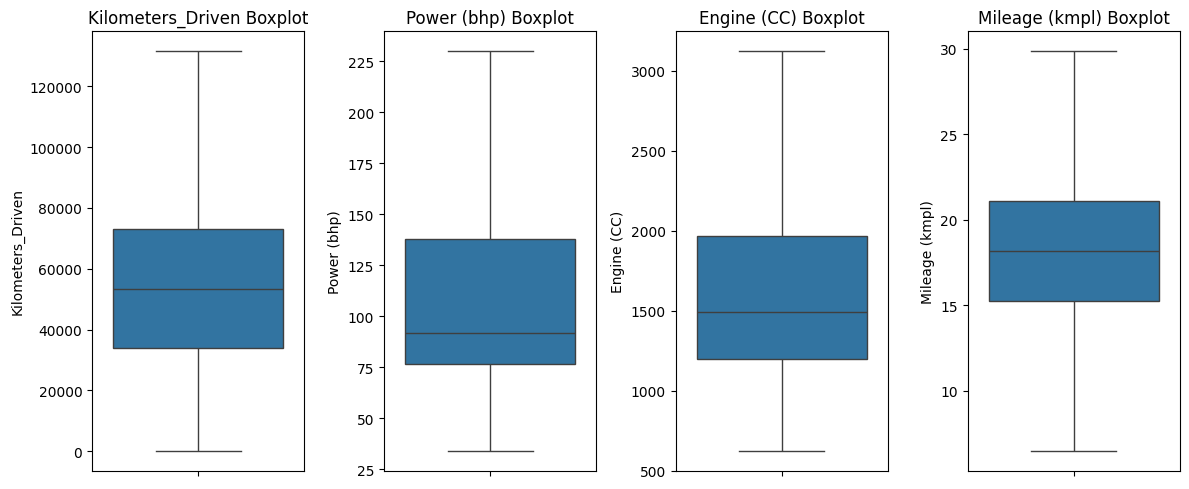

In [59]:
# Create subplots with automatic grid sizing
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(12, 5))

# Loop through each column and create a boxplot
for col, ax in zip(numerical_columns, axes):
    sns.boxplot(data=numerical_data_copy, y=col, ax=ax)
    ax.set_title(f"{col} Boxplot")
    ax.set_ylabel(col)

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
numerical_data_copy

,Kilometers_Driven,Power (bhp),Engine (CC),Mileage (kmpl)
0,72000,58.16,998,29.86
1,41000,126.20,1582,19.67
2,46000,88.70,1199,18.20
3,87000,88.76,1248,20.77
4,40670,140.80,1968,15.20
...,...,...,...,...
7248,89411,103.60,1598,20.54
7249,59000,103.60,1197,17.21
7250,28000,63.10,1461,23.08
7251,52262,103.60,1197,17.20


Now our dataset is outlier free.

In [61]:
# Lets first create a copy of our data

cars_data_4 = cars_data_3.copy()

In [62]:
cars_data_4.drop(columns=['Kilometers_Driven','Mileage (kmpl)','Engine (CC)','Power (bhp)'], inplace=True)

In [63]:
cars_data_4

,Brand,Model,Location,Cars_age,Fuel_Type,Transmission,Owner_Type,Seats,Price,tag
0,Maruti,Wagon,Mumbai,14,CNG,Manual,First,5,1.75,train
1,Hyundai,Creta,Pune,9,Diesel,Manual,First,5,12.50,train
2,Honda,Jazz,Chennai,13,Petrol,Manual,First,5,4.50,train
3,Maruti,Ertiga,Chennai,12,Diesel,Manual,First,7,6.00,train
4,Audi,A4,Coimbatore,11,Diesel,Automatic,Second,5,17.74,train
...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Vento,Hyderabad,13,Diesel,Manual,First,5,NaN,test
7249,Volkswagen,Polo,Mumbai,9,Petrol,Automatic,First,5,NaN,test
7250,Nissan,Micra,Kolkata,12,Diesel,Manual,First,5,NaN,test
7251,Volkswagen,Polo,Pune,11,Petrol,Automatic,Third,5,NaN,test


In [64]:
cars_data_5 = pd.merge(cars_data_4, numerical_data_copy, left_index=True, right_index=True)

In [65]:
cars_data_5

,Brand,Model,Location,Cars_age,Fuel_Type,Transmission,Owner_Type,Seats,Price,tag,Kilometers_Driven,Power (bhp),Engine (CC),Mileage (kmpl)
0,Maruti,Wagon,Mumbai,14,CNG,Manual,First,5,1.75,train,72000,58.16,998,29.86
1,Hyundai,Creta,Pune,9,Diesel,Manual,First,5,12.50,train,41000,126.20,1582,19.67
2,Honda,Jazz,Chennai,13,Petrol,Manual,First,5,4.50,train,46000,88.70,1199,18.20
3,Maruti,Ertiga,Chennai,12,Diesel,Manual,First,7,6.00,train,87000,88.76,1248,20.77
4,Audi,A4,Coimbatore,11,Diesel,Automatic,Second,5,17.74,train,40670,140.80,1968,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Vento,Hyderabad,13,Diesel,Manual,First,5,NaN,test,89411,103.60,1598,20.54
7249,Volkswagen,Polo,Mumbai,9,Petrol,Automatic,First,5,NaN,test,59000,103.60,1197,17.21
7250,Nissan,Micra,Kolkata,12,Diesel,Manual,First,5,NaN,test,28000,63.10,1461,23.08
7251,Volkswagen,Polo,Pune,11,Petrol,Automatic,Third,5,NaN,test,52262,103.60,1197,17.20


# Converting Categorical Features

We need to convert categorical column to dummy variables.

- Now that we can cleared the outliers
- Lets make our train and test data

In [66]:
train_data = cars_data_5[cars_data_5['tag'] == 'train']
test_data = cars_data_5[cars_data_5['tag'] == 'test']

train_data.drop('tag',axis = 1, inplace=True)
test_data.drop('tag',axis = 1, inplace=True)

In [67]:
categorical_data = train_data.select_dtypes(include='object')
categorical_data.columns

Index(['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission',
       'Owner_Type'],
      dtype='object')

Lets check number of unique values inisde the column for one-hot encoding

In [68]:
for column in categorical_data.columns:
    print(f"{column} has number of unique values : ", len(categorical_data[column].unique()))

Brand has number of unique values :  31
Model has number of unique values :  209
Location has number of unique values :  11
Fuel_Type has number of unique values :  4
Transmission has number of unique values :  2
Owner_Type has number of unique values :  4


- **Target encoding** for categorical data with columns like brand and model since number of unique values is more.
- **One-hot encoding** for rest of the categorical columns

In [69]:
# One-Hot encoding
one_hot_categorical_data = categorical_data[['Location','Fuel_Type','Transmission','Owner_Type']]

In [70]:
one_hot_categorical_data = pd.get_dummies(one_hot_categorical_data, drop_first=True)
one_hot_categorical_data_1 = one_hot_categorical_data.astype(int)
one_hot_categorical_data_1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [71]:
# Target Encoding

# Assuming 'Price' is the target variable
from sklearn.preprocessing import LabelEncoder

# For Brand and Model columns, replace with mean price for each category
brand_mean = train_data.groupby('Brand')['Price'].mean()
model_mean = train_data.groupby('Model')['Price'].mean()

train_data['Brand'] = train_data['Brand'].map(brand_mean)
train_data['Model'] = train_data['Model'].map(model_mean)

In [72]:
# dropping the categorical data to replacing it with dummy variables
train_data.drop(columns=['Location','Fuel_Type','Transmission','Owner_Type'], inplace=True)

In [73]:
train_data_1 = pd.merge(train_data,one_hot_categorical_data_1, left_index=True, right_index=True)

In [74]:
train_data_1

,Brand,Model,Cars_age,Seats,Price,Kilometers_Driven,Power (bhp),Engine (CC),Mileage (kmpl),Location_Bangalore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,4.538730,2.829542,14,5,1.75,72000,58.16,998,29.86,0,...,0,1,0,0,0,0,1,0,0,0
1,5.363673,12.177634,9,5,12.50,41000,126.20,1582,19.67,0,...,0,0,1,1,0,0,1,0,0,0
2,5.430948,6.090526,13,5,4.50,46000,88.70,1199,18.20,0,...,0,0,0,0,0,1,1,0,0,0
3,4.538730,6.964800,12,7,6.00,87000,88.76,1248,20.77,0,...,0,0,0,1,0,0,1,0,0,0
4,25.537712,18.397051,11,5,17.74,40670,140.80,1968,15.20,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.538730,4.741312,10,5,4.75,27365,74.00,1248,28.40,0,...,0,0,0,1,0,0,1,0,0,0
6015,5.363673,4.715085,9,5,4.00,100000,71.00,1120,24.40,0,...,0,0,0,1,0,0,1,0,0,0
6016,8.027638,4.670000,12,8,2.90,55000,112.00,2498,14.00,0,...,0,0,0,1,0,0,1,0,1,0
6017,4.538730,2.829542,11,5,2.65,46000,67.10,998,18.90,0,...,1,0,0,0,0,1,1,0,0,0


# Training and Perdicting

We are using Normalization or Standzrdization method to scale our dataset.

In [75]:
from sklearn.preprocessing import MinMaxScaler # Normalization rescales value to 0 to 1 
from sklearn.preprocessing import StandardScaler # Standarization rescales value in such a way that its mean will be 0 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

### Without Pipeline

In [76]:

# Define features and target variable
X = train_data_1.drop(columns = 'Price')
y = train_data_1['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

# Step 1: Apply scaling manually to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions and evaluate
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print("Without Pipeline:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Without Pipeline:
MSE: 18.351158483649133
RMSE: 4.283825216281487
R-squared: 0.8530075457281997


### With Pipeline

In [77]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor()
}

### StandardScaler

In [78]:
from sklearn.pipeline import make_pipeline

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

# Step 1: Create a pipeline with scaling and regression models

# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    # Step 2: Train the model
    pipeline.fit(X_train, y_train)

    # Step 3: Make predictions and evaluate
    y_pred = pipeline.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [79]:
results_df = pd.DataFrame(results).T
results_df

,MSE,RMSE,R2
Linear Regression,18.351158,4.283825,0.853008
Ridge Regression,18.349657,4.283650,0.853020
Lasso Regression,22.324915,4.724925,0.821178
ElasticNet Regression,25.881579,5.087394,0.792689
Random Forest Regressor,8.398098,2.897947,0.932731
Gradient Boosting Regressor,7.077378,2.660334,0.943310
Support Vector Regressor,23.071063,4.803235,0.815201
AdaBoostRegressor,34.659217,5.887208,0.722380
KNeighborsRegressor,16.643792,4.079680,0.866684
XGBRegressor,6.818971,2.611316,0.945380


- MSE (Mean Squared Error): Lower values are better. It represents the average squared difference between the predicted and actual values.
- RMSE (Root Mean Squared Error): Like MSE, but in the same unit as the target variable (Price). Lower values are better.
- R² (R-squared): Higher values are better. It represents how much of the variance in the target variable is explained by the model.

### MinMaxscaler

In [80]:
from sklearn.pipeline import make_pipeline

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

# Step 1: Create a pipeline with scaling and regression models

# Dictionary to store results
results_minmax = {}

# Evaluate each model
for name, model in models.items():
    pipeline = make_pipeline(MinMaxScaler(), model)

    # Step 2: Train the model
    pipeline.fit(X_train, y_train)

    # Step 3: Make predictions and evaluate
    y_pred = pipeline.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results_minmax[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [81]:
results_df_min_max = pd.DataFrame(results_minmax).T
results_df_min_max

,MSE,RMSE,R2
Linear Regression,18.351158,4.283825,0.853008
Ridge Regression,18.302134,4.278099,0.853400
Lasso Regression,69.301541,8.324755,0.444896
ElasticNet Regression,90.881430,9.533175,0.272041
Random Forest Regressor,8.282135,2.877870,0.933660
Gradient Boosting Regressor,7.175440,2.678701,0.942525
Support Vector Regressor,25.748705,5.074318,0.793753
AdaBoostRegressor,30.471487,5.520098,0.755924
KNeighborsRegressor,22.388918,4.731693,0.820665
XGBRegressor,6.818971,2.611316,0.945380


In [ ]:
# Mean Squared Error

from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model.__class__.__name__}, Cross-Validation MSE: {cv_scores.mean()}")

Model: LinearRegression, Cross-Validation MSE: -23.102019072989226
Model: Ridge, Cross-Validation MSE: -23.100208276917037
Model: Lasso, Cross-Validation MSE: -24.3286529377485
Model: ElasticNet, Cross-Validation MSE: -24.2579069779541
Model: RandomForestRegressor, Cross-Validation MSE: -13.101918790576729
Model: GradientBoostingRegressor, Cross-Validation MSE: -12.924249272306998
Model: SVR, Cross-Validation MSE: -132.5114037590652
Model: AdaBoostRegressor, Cross-Validation MSE: -38.52502496219475
Model: KNeighborsRegressor, Cross-Validation MSE: -58.89788879748954
Model: XGBRegressor, Cross-Validation MSE: -10.878929875519656


In [84]:
# R2 Score

from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Model: {model.__class__.__name__}, Cross-Validation MSE: {cv_scores.mean()}")

Model: LinearRegression, Cross-Validation MSE: 0.8176175555232643
Model: Ridge, Cross-Validation MSE: 0.8176328380640893
Model: Lasso, Cross-Validation MSE: 0.8078614285465125
Model: ElasticNet, Cross-Validation MSE: 0.8084531004561868
Model: RandomForestRegressor, Cross-Validation MSE: 0.9015218179064135
Model: GradientBoostingRegressor, Cross-Validation MSE: 0.8979140417864168
Model: SVR, Cross-Validation MSE: -0.05493042382137321
Model: AdaBoostRegressor, Cross-Validation MSE: 0.7174034628390471
Model: KNeighborsRegressor, Cross-Validation MSE: 0.5301744399116922
Model: XGBRegressor, Cross-Validation MSE: 0.9148659893999802


In conclusion, tree-based models like XGBoost, GradientBoost and Random Forest provided the most accurate predictions for car prices. The most important features were 'Engine', 'Power', 'Mileage', and 'Car Age'. Future work could involve tuning hyperparameters to further improve the performance.